# Descargar noticias de un medio digital

En esta práctica vamos a descargar los titulares de las noticias de un medio de comunicación digital

## Importar las librerías que necesitaremos

Vamos a utilizar urllib3 y Beautiful Soup

    conda install beautifulsoup4 urllib3 nltk
    

## Instalamos el beautifulsoup4 urllib3 nltk
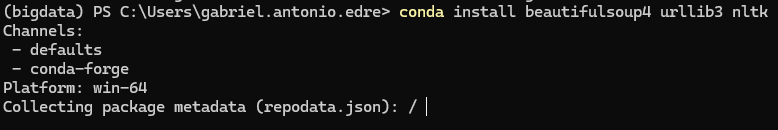

In [34]:
#!/usr/bin/env python

import urllib3, nltk
from bs4 import BeautifulSoup

#Librerías básicas
import numpy as np
import pandas as pd

#Librerías para imaxes, nubes de palabras e plot
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

#Librarías para limpieza de datos
import string
import nltk
from nltk.corpus import stopwords

## Descargar la página

Emplearemos un UserAgent (navegador) de móvil para identificarnos con la página

In [35]:
ua = "Mozilla/5.0 (Linux; U; Android 2.2; en-us; Nexus One Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1"  
h = {"User-Agent": ua}

http = urllib3.PoolManager()
#medioDigital= "http://20minutos.es"
#medioDigital= "http://www.elpais.com"
#medioDigital= "http://www.elmundo.es"
medioDigital= "http://www.lavozdegalicia.es"
r = http.request('GET', medioDigital, fields=None, headers=h)


## Quitar código HTML

In [36]:
sopa = BeautifulSoup(r.data, "html.parser")
web_solotexto = sopa.get_text()

salida = ''
#excluirlineas=4

for linea in web_solotexto.split('\n'):
    aux=linea.strip()
    if aux and len(aux) > 50:
        salida += aux + '\n'
        #if not aux.startswith('Comentarios ('):
        #    excluirlineas=excluirlineas-1
        #    if (excluirlineas < 0):
        #        vartext2 = vartext2 + aux + '\n'

#print (salida)

#Otra forma, quizás más elegante:
titulares = sopa.find_all('h4')

aux = []
for titular in titulares:
    aux.append(titular.get_text().strip())

global clean_texto
clean_texto = " ".join(aux)

stop_words = stopwords.words('spanish') #Listado de palabras a eliminar

stop_words += ["\u200b", "\xa0", "para", "como", "puede","cómo", "hacer", "forma", "parte", "hace", "además", "según", "pueden", "ser"] #Añadimos algunos caractéres que hemos encontrado

stop_words[:10]

punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

punctuation[:10] #Ejemplo de los símbolos de puntuación que están incluidos

def FormatearCadena():
    global clean_texto
    #Reemplazamos signos de puntuación por "":
    for sw in stop_words:
        clean_texto = clean_texto.lower().replace(" "+sw+" "," ")
        
    for p in punctuation:
        clean_texto = clean_texto.replace(p," ")

    #Eliminamos espacios blancos, saltos de línea, tabuladores, etc    
    #clean_texto = " ".join(clean_texto.split())    

    #Reemplazamos stop_words por "":    
    for stop in stop_words:
        clean_texto_list = clean_texto.split()
        clean_texto_list = [i.strip() for i in clean_texto_list]
        try:
            while stop in clean_texto_list: clean_texto_list.remove(stop)
        except:
            print("Error")
            pass
        clean_texto= " ".join(clean_texto_list)
    
    print(clean_texto)

FormatearCadena()

In [37]:
lista_texto = clean_texto.split(" ")

palabras = []

#Paso intermedio para eliminar palabras muy cortas (emoticonos,etc) y muy largas (ulr o similar) que se nos hayan pasado:

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

word_count={}

for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]
        
df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

,freq
que,36
del,29
los,26
para,17
con,16
por,13
las,13
una,12
Los,7
más,7


In [38]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

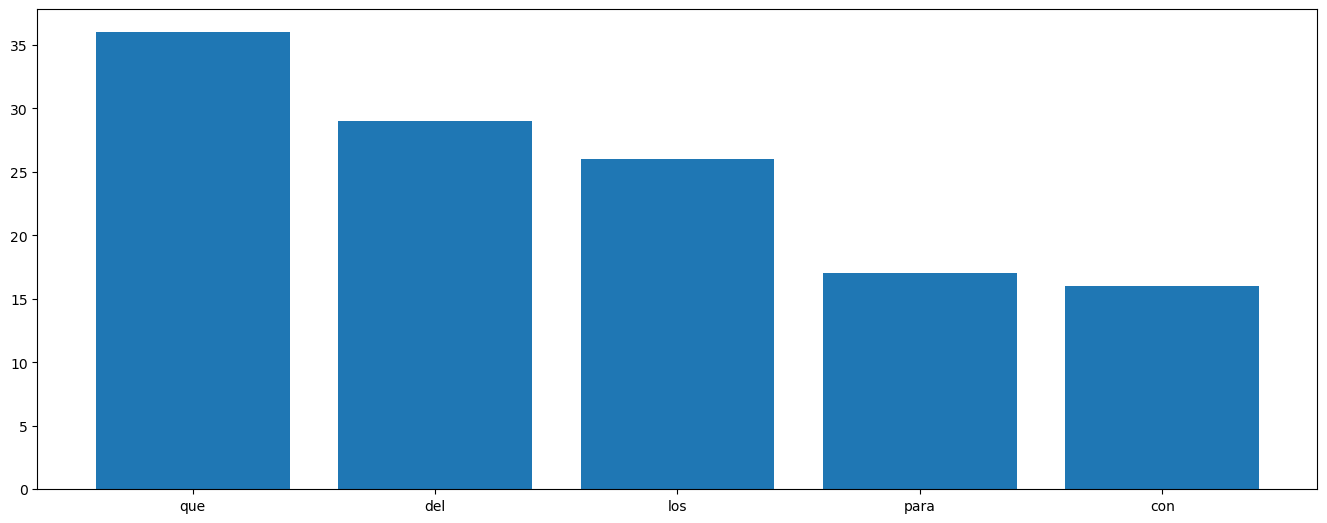

In [39]:
#Graficamos el TOP 5 palabras por frecuencia

plot_bar(data=df, top=5)

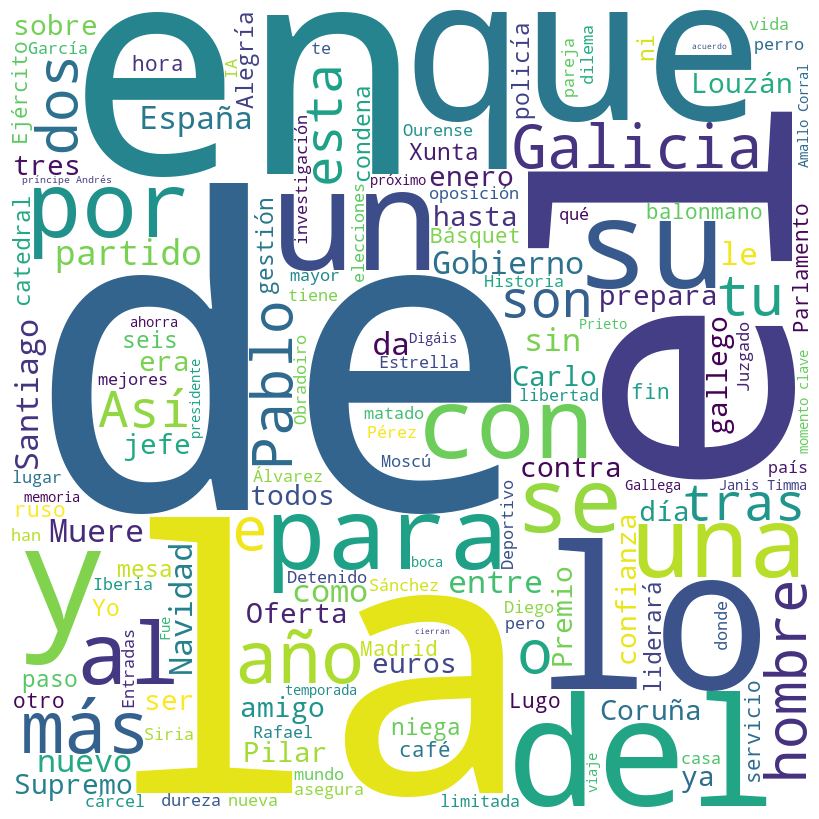

In [40]:
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5).generate(clean_texto)

#word_cloud.to_file("./img/ejemplo_sencillo.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()